In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from os import path
from PIL import Image
%conda install -c conda-forge wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [93]:
cm = pd.read_csv("chocolate_makers.csv")
cr = pd.read_csv("chocolate_ratings.csv")

In [94]:
new_cols = []
for col in cm.columns:
    new_cols.append(col.replace('/', '_'))
new_cols = []
for col in cm.columns:
    new_cols.append(col.replace(' ', '_'))
cm.columns = new_cols

In [54]:
# Check for missing values
cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   COMPANY_NAME    373 non-null    object
 1   CITY            373 non-null    object
 2   STATE/PROVINCE  373 non-null    object
 3   OWNER/MAKER     370 non-null    object
 4   COUNTRY         373 non-null    object
dtypes: object(5)
memory usage: 14.7+ KB


In [55]:
cm.head()

,COMPANY_NAME,CITY,STATE/PROVINCE,OWNER/MAKER,COUNTRY
0,Choklat,Calgary,Alberta,Brad Churchill,Canada
1,Yukon Chocolate Company,Calgary,Alberta,Sydney Oland,Canada
2,Kin+Pod,Calgary,Alberta,Georden Spicer,Canada
3,Goldie,Calgary,Alberta,Amy Horne (instagram),Canada
4,Moth Chocolate,Calgary,Alberta,Geordan Spicer (mothchocolate.com),Canada


In [56]:
new_cols = []
for col in cr.columns:
    new_cols.append(col.replace('/', '_'))
new_cols = []
for col in cr.columns:
    new_cols.append(col.replace(' ', '_'))
cr.columns = new_cols

In [57]:
# Check for missing values
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2530 non-null   int64  
 1   Company_(Manufacturer)            2530 non-null   object 
 2   Company_Location                  2530 non-null   object 
 3   Review_Date                       2530 non-null   int64  
 4   Country_of_Bean_Origin            2530 non-null   object 
 5   Specific_Bean_Origin_or_Bar_Name  2530 non-null   object 
 6   Cocoa_Percent                     2530 non-null   object 
 7   Ingredients                       2443 non-null   object 
 8   Most_Memorable_Characteristics    2530 non-null   object 
 9   Rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


In [58]:
cr.head()

,REF,Company_(Manufacturer),Company_Location,Review_Date,Country_of_Bean_Origin,Specific_Bean_Origin_or_Bar_Name,Cocoa_Percent,Ingredients,Most_Memorable_Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


<AxesSubplot:>

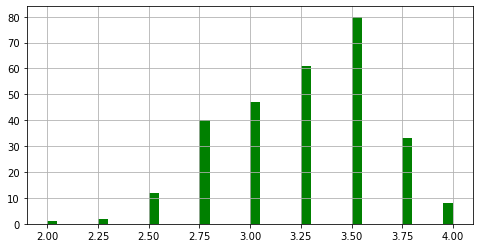

In [59]:
#distribution plot of ratings from 2015
cr.query("Review_Date == 2015")['Rating'].hist(color='green',bins=40,figsize=(8,4))

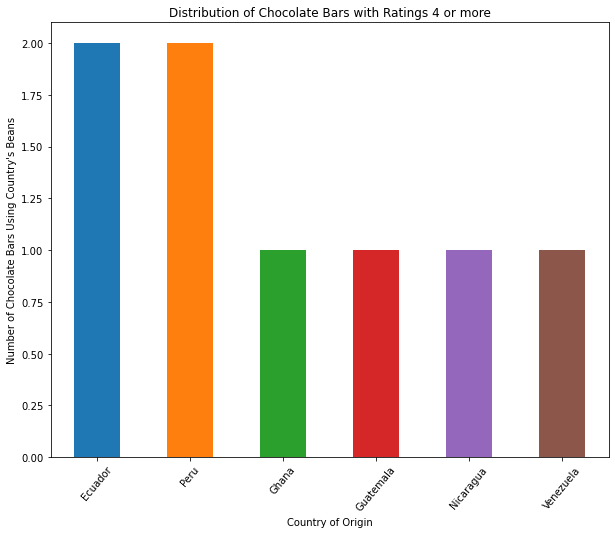

In [60]:
# Groupby by country
country = cr.query("Review_Date == 2015 and Rating >=4").groupby("Country_of_Bean_Origin")

plt.figure(figsize=(10,8))
c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
country.size().sort_values(ascending=False).plot.bar(color = c)
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Chocolate Bars Using Country's Beans")
plt.title("Distribution of Chocolate Bars with Ratings 4 or more")
plt.show()
#no need to organize them by highest ratings, as there appears to be no reviews above 4.00 at all.
#take top three

In [90]:
# Groupby by cocoa_percent among top three
country = cr.query("Review_Date == 2015 and Rating >= 4").groupby("Cocoa_Percent")

plt.figure(figsize=(10,8))
c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
country.size().sort_values(ascending=False).plot.bar(color = c)
plt.xticks(rotation=50)
plt.xlabel("Cocoa Percent")
plt.ylabel("Number of Chocolate Bars")
plt.title("Distribution of Chocolate Bars with Ratings of 4")
plt.show()

KeyError: 'Cocoa_Percent'

In [62]:
cr.query("Review_Date == 2015 and Rating >= 4")

,REF,Company_(Manufacturer),Company_Location,Review_Date,Country_of_Bean_Origin,Specific_Bean_Origin_or_Bar_Name,Cocoa_Percent,Ingredients,Most_Memorable_Characteristics,Rating
129,1598,Arete,U.S.A.,2015,Nicaragua,Chuno,70%,"2- B,S","creamy,sticky, peanut butter",4.0
811,1662,Duffy's,U.K.,2015,Guatemala,"Rio Dulce, Xoco",70%,"4- B,S,C,L","intense, spicy, butterscotch",4.0
822,1630,Durci,U.S.A.,2015,Ecuador,Corona Arriba,70%,"3- B,S,C",blackberry and cinnamon,4.0
1048,1642,Georgia Ramon,Germany,2015,Ghana,ABOCFA Coop,70%,"4- B,S,C,L",cocoa and coconut,4.0
1716,1558,Ocelot,Scotland,2015,Peru,Piura,75%,"3- B,S,C","peanut butter, raspberry",4.0
2107,1622,"Smooth Chocolator, The",Australia,2015,Ecuador,Camino Verde,72%,"3- B,S,C","creamy, pistachio, floral",4.0
2176,1594,Soma,Canada,2015,Venezuela,Porcelana,75%,"3- B,S,C","balanced, nuts, strawberry",4.0
2398,1510,Valrhona,France,2015,Peru,"Piura, Illanka, Quemazon",63%,"5- B,S,C,V,L","intense, dark berry, grapes",4.0


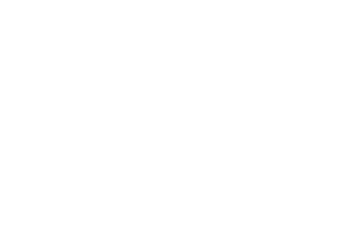

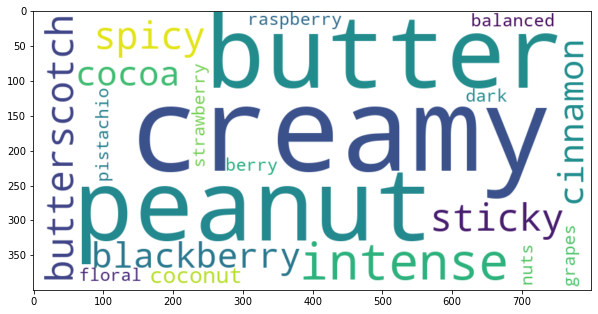

In [63]:

# Text of all words in column
text = " ".join(review for review in cr.query("Review_Date == 2015 and Rating >=4")['Most_Memorable_Characteristics'].astype(str))

wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(10,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

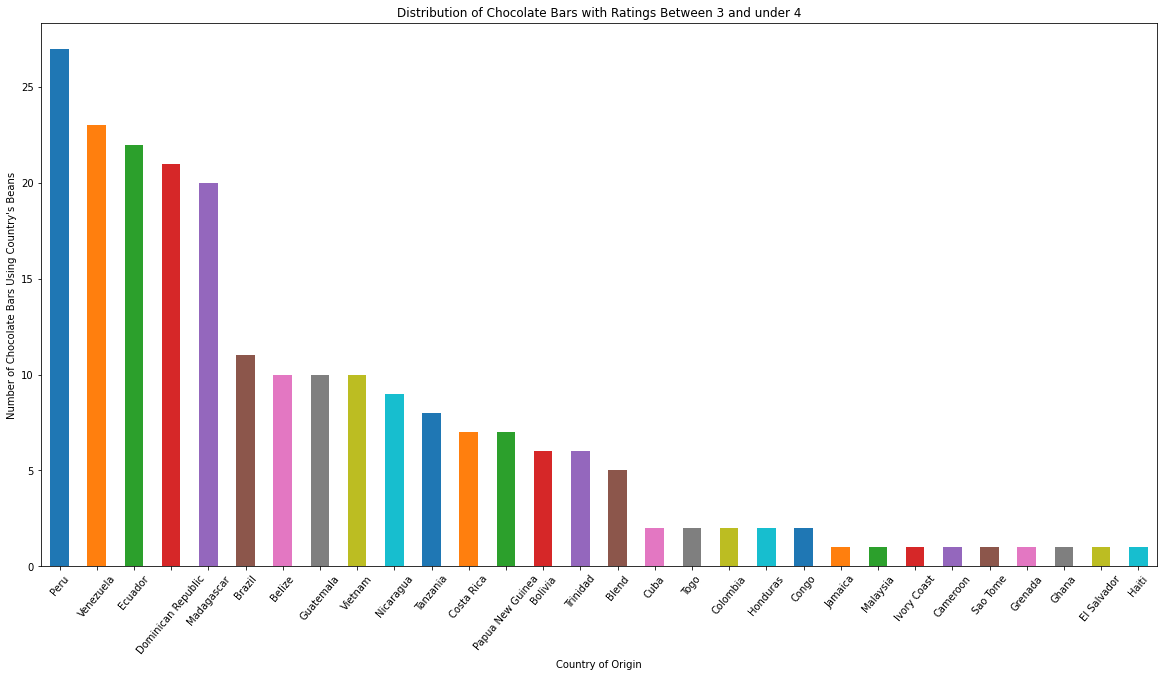

In [64]:
# Groupby by country for rating
country = cr.query("Review_Date == 2015 and Rating >=3 and Rating < 4").groupby("Country_of_Bean_Origin")

plt.figure(figsize=(20,10))
c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
country.size().sort_values(ascending=False).plot.bar(color = c)
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Chocolate Bars Using Country's Beans")
plt.title("Distribution of Chocolate Bars with Ratings Between 3 and under 4")
plt.show()

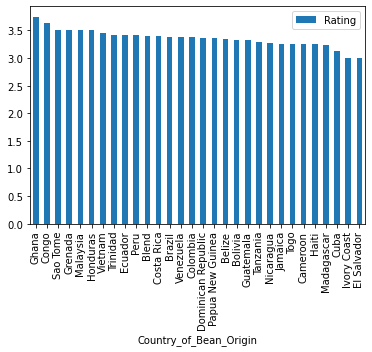

In [65]:
c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Top 5 companies in terms of average Cocoa Percentage
country = cr.query("Review_Date == 2015 and Rating >=3 and Rating < 4").groupby("Country_of_Bean_Origin").aggregate({'Rating':'mean'})
country = country.sort_values('Rating', ascending=False).plot.bar(color = c)

In [66]:
print("Average Rating of Chocolate from Peru:")
r = cr.query("Review_Date == 2015 and Rating >=3 and Rating < 4 and Country_of_Bean_Origin == 'Peru'")['Rating'].mean()
print(r)

Average Rating of Chocolate from Peru:
3.4074074074074074


In [67]:
print("Average Rating of Chocolate from Venezuela:")
r = cr.query("Review_Date == 2015 and Rating >=3 and Rating < 4 and Country_of_Bean_Origin == 'Venezuela'")['Rating'].mean()
print(r)

Average Rating of Chocolate from Venezuela:
3.380434782608696


In [68]:
print("Average Rating of Chocolate from Ecuador:")
r = cr.query("Review_Date == 2015 and Rating >=3 and Rating < 4 and Country_of_Bean_Origin == 'Ecuador'")['Rating'].mean()
print(r)

Average Rating of Chocolate from Ecuador:
3.409090909090909


In [69]:
print("The top order of the top three countries with ratings under three are: Ecuador, Peru, and Venezula")

The top order of the top three countries with ratings under three are: Ecuador, Peru, and Venezula


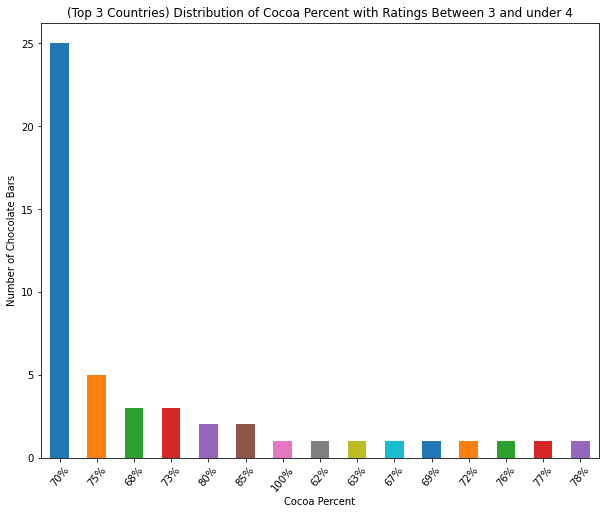

In [70]:
# Groupby by cocoa_percent among top three
country = cr.query("Review_Date == 2015 and Rating >=3 and Rating < 4 and (Country_of_Bean_Origin == 'Ecuador' or Country_of_Bean_Origin == 'Peru' or Country_of_Bean_Origin == 'Venezula')").groupby("Cocoa_Percent")

plt.figure(figsize=(10,8))
c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
country.size().sort_values(ascending=False).plot.bar(color = c)
plt.xticks(rotation=50)
plt.xlabel("Cocoa Percent")
plt.ylabel("Number of Chocolate Bars")
plt.title("(Top 3 Countries) Distribution of Cocoa Percent with Ratings Between 3 and under 4")
plt.show()

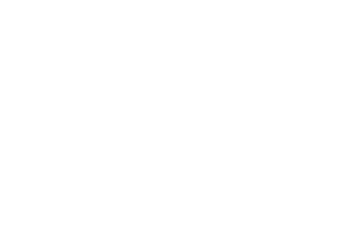

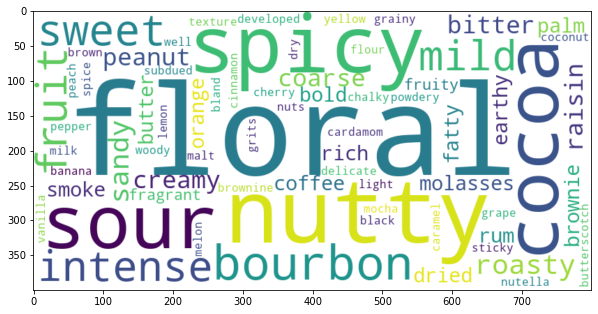

In [71]:
# Text of all words in column
text = " ".join(review for review in cr.query("Review_Date == 2015 and Rating >=3 and Rating < 4 and (Country_of_Bean_Origin == 'Ecuador' or Country_of_Bean_Origin == 'Peru' or Country_of_Bean_Origin == 'Venezula')")['Most_Memorable_Characteristics'].astype(str))

wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(10,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

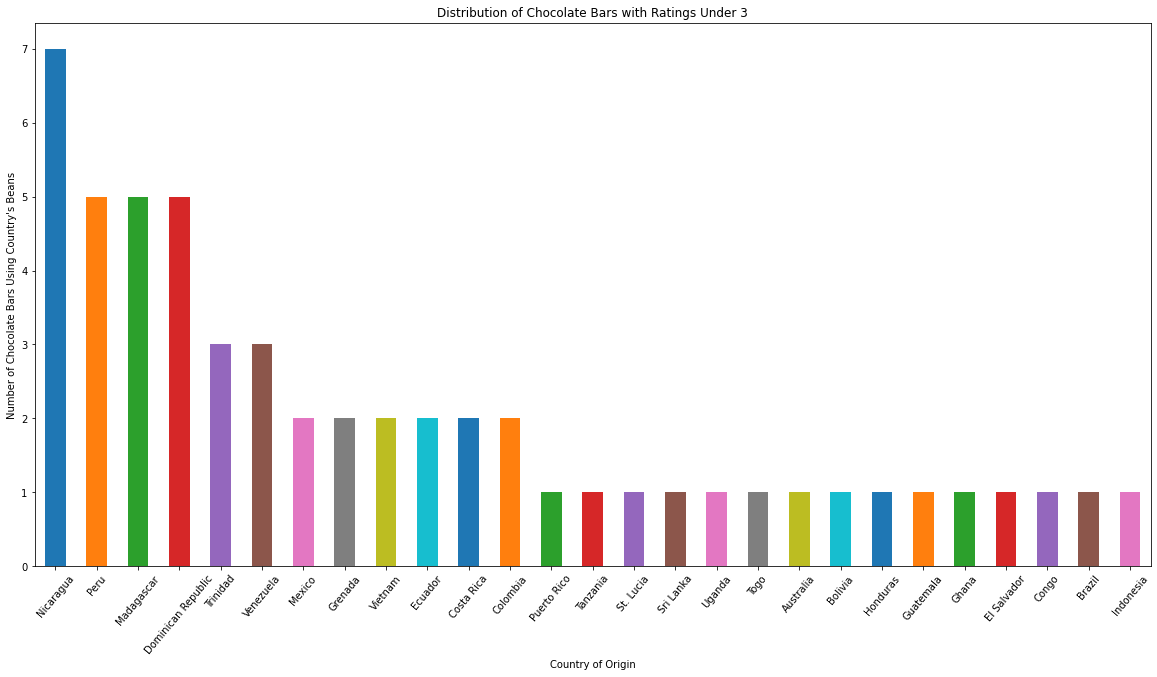

In [72]:
# Groupby by country
country = cr.query("Review_Date == 2015 and Rating < 3").groupby("Country_of_Bean_Origin")

plt.figure(figsize=(20,10))
c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
country.size().sort_values(ascending=False).plot.bar(color = c)
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Chocolate Bars Using Country's Beans")
plt.title("Distribution of Chocolate Bars with Ratings Under 3")
plt.show()

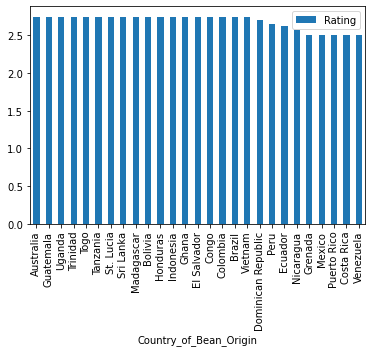

In [73]:
c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Top 5 companies in terms of average Cocoa Percentage
country = cr.query("Review_Date == 2015 and Rating < 3").groupby("Country_of_Bean_Origin").aggregate({'Rating':'mean'})
country = country.sort_values('Rating', ascending=False).plot.bar(color = c)

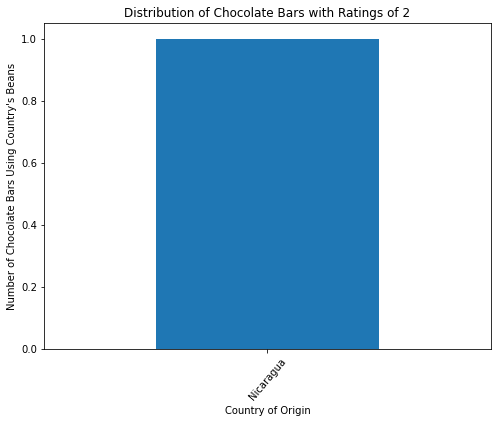

In [74]:
# Groupby by country
country = cr.query("Review_Date == 2015 and Rating == 2").groupby("Country_of_Bean_Origin")

plt.figure(figsize=(8,6))
c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
country.size().sort_values(ascending=False).plot.bar(color = c)
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Chocolate Bars Using Country's Beans")
plt.title("Distribution of Chocolate Bars with Ratings of 2")
plt.show()

In [75]:
print("Average Rating of Chocolate from Nicaragua:")
r = cr.query("Review_Date == 2015 and Rating < 3 and Country_of_Bean_Origin == 'Nicaragua'")['Rating'].mean()
print(r)

Average Rating of Chocolate from Nicaragua:
2.5714285714285716


In [76]:
print("Average Rating of Chocolate from Peru:")
r = cr.query("Review_Date == 2015 and Rating < 3 and Country_of_Bean_Origin == 'Peru'")['Rating'].mean()
print(r)

Average Rating of Chocolate from Peru:
2.65


In [77]:
print("Average Rating of Chocolate from Madagascar:")
r = cr.query("Review_Date == 2015 and Rating < 3 and Country_of_Bean_Origin == 'Madagascar'")['Rating'].mean()
print(r)

Average Rating of Chocolate from Madagascar:
2.75


In [78]:
print("The top order of the top three countries with ratings under three are: Madagascar, Peru, Nicaragua")

The top order of the top three countries with ratings under three are: Madagascar, Peru, Nicaragua


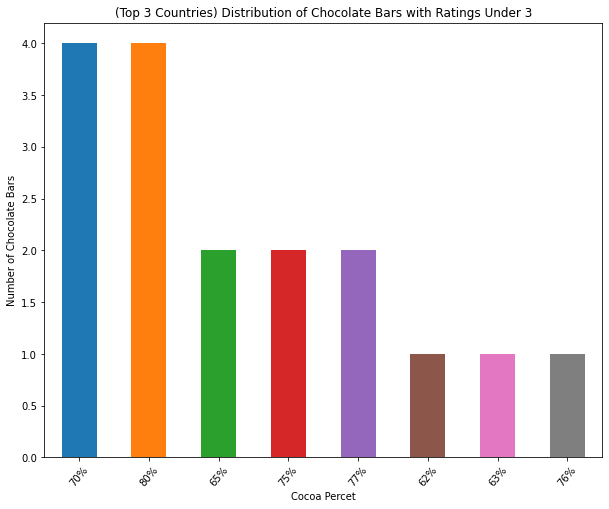

In [79]:
# Groupby by cocoa_percent among top three
country = cr.query("Review_Date == 2015 and Rating < 3 and (Country_of_Bean_Origin == 'Madagascar' or Country_of_Bean_Origin == 'Peru' or Country_of_Bean_Origin == 'Nicaragua')").groupby("Cocoa_Percent")

plt.figure(figsize=(10,8))
c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
country.size().sort_values(ascending=False).plot.bar(color = c)
plt.xticks(rotation=50)
plt.xlabel("Cocoa Percet")
plt.ylabel("Number of Chocolate Bars")
plt.title("(Top 3 Countries) Distribution of Chocolate Bars with Ratings Under 3")
plt.show()

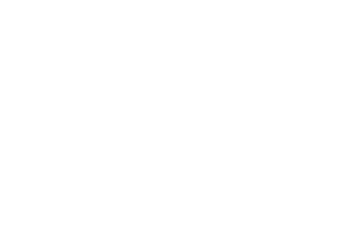

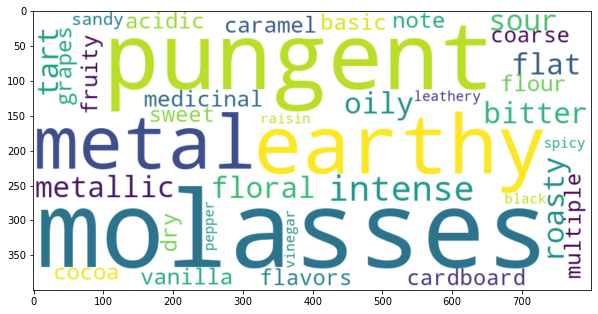

In [80]:
# Text of all words in column
text = " ".join(review for review in cr.query("Review_Date == 2015 and Rating < 3 and (Country_of_Bean_Origin == 'Madagascar' or Country_of_Bean_Origin == 'Peru' or Country_of_Bean_Origin == 'Nicaragua')")['Most_Memorable_Characteristics'].astype(str))

wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(10,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [81]:
cr.query("Review_Date == 2015 and Country_of_Bean_Origin == 'Peru'")

,REF,Company_(Manufacturer),Company_Location,Review_Date,Country_of_Bean_Origin,Specific_Bean_Origin_or_Bar_Name,Cocoa_Percent,Ingredients,Most_Memorable_Characteristics,Rating
28,1704,A. Morin,France,2015,Peru,Quilla,70%,"4- B,S,C,L","grainy texture, cocoa, sweet",3.50
33,1462,Acalli,U.S.A.,2015,Peru,"Chulucanas, El Platanal, batch 001",70%,"2- B,S",yellow fruit,3.75
34,1470,Acalli,U.S.A.,2015,Peru,"Tumbes, Norandino",70%,"2- B,S","intense, nutty, cherry, cocoa",3.75
94,1498,Ambrosia,Canada,2015,Peru,Peru,68%,"2- B,S","rich, sour, mild smoke",3.50
124,1534,Arete,U.S.A.,2015,Peru,Nacional,68%,"2- B,S","floral, nutty, rich cocoa",3.50
196,1454,Bakau,Peru,2015,Peru,"Bambamarca, 2015",70%,"3- B,S,C","molasses, caramel, pungent",2.75
197,1454,Bakau,Peru,2015,Peru,"Huallabamba, 2015",70%,"3- B,S,C","black pepper, cardamom",3.50
417,1684,Cacao Store,Japan,2015,Peru,Peru,70%,"2- B,S","dried fruit, sour, nutella",3.25
519,1482,Chocolarder,U.K.,2015,Peru,"Peru, batch C7",65%,"2- B,S","flat, metallic, floral",2.50
521,1482,Chocolarder,U.K.,2015,Peru,"Peru + nibs, batch C6",65%,"2- B,S","flat, floral, medicinal",2.75


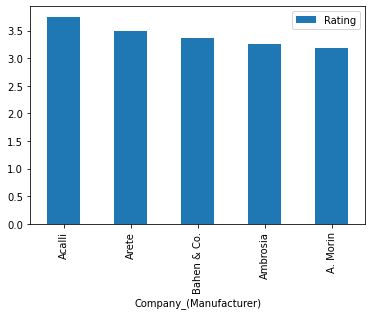

In [82]:
c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Top 5 companies in terms of average Cocoa Percentage
country = cr.query("Review_Date == 2015").groupby("Company_(Manufacturer)").aggregate({'Rating':'mean'}).head(5)
country = country.sort_values('Rating', ascending=False).plot.bar(color = c)

In [83]:
cr.query("Review_Date == 2015").groupby("Company_(Manufacturer)").aggregate({'Rating':'mean'}).head(5)

,Rating
Company_(Manufacturer),
A. Morin,3.1875
Acalli,3.7500
Ambrosia,3.2500
Arete,3.5000
Bahen & Co.,3.3750


In [91]:
cr.query("Review_Date == 2015").groupby("Ingredients").aggregate({'Rating':'mean'}).head(5)

KeyError: 'Ingredients'

In [84]:
peru = cr[cr['Country_of_Bean_Origin']=='Peru']

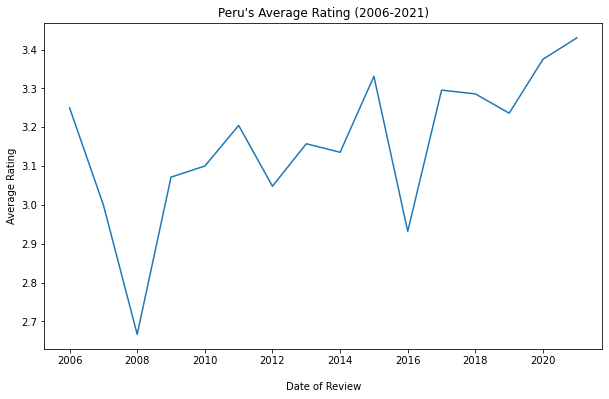

In [85]:


#Peru ratings
cr = peru.groupby('Review_Date').aggregate({'Rating':'mean'})
cr = cr.reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Review_Date', y='Rating', data=cr)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Peru's Average Rating (2006-2021)")
plt.show()

In [89]:
ecu = cr[cr['Country_of_Bean_Origin']=='Ecuador']

KeyError: 'Country_of_Bean_Origin'

In [50]:


#Peru ratings
cr = ecu.groupby('Review_Date').aggregate({'Rating':'mean'})
cr = cr.reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Review_Date', y='Rating', data=cr)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Peru's Average Rating (2006-2021)")
plt.show()

NameError: name 'ecu' is not defined